In [3]:
#MELEK KURU  2315873
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import random
import matplotlib.pyplot as plt
from math import sqrt


In [4]:
#TASK 1

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22621.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 2 rows, 8 columns and 16 nonzeros
Model fingerprint: 0x946e3022
Model has 36 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve time: 0.02s
Presolved: 2 rows, 8 columns, 16 nonzeros
Presolved model has 36 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 7
 AA' NZ     : 3.600e+01
 Factor NZ  : 4.500e+01
 Factor Ops : 2.850e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal    

C:\Users\melek\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 120583 (\N{MATHEMATICAL ITALIC SMALL MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\melek\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 120590 (\N{MATHEMATICAL ITALIC SMALL SIGMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


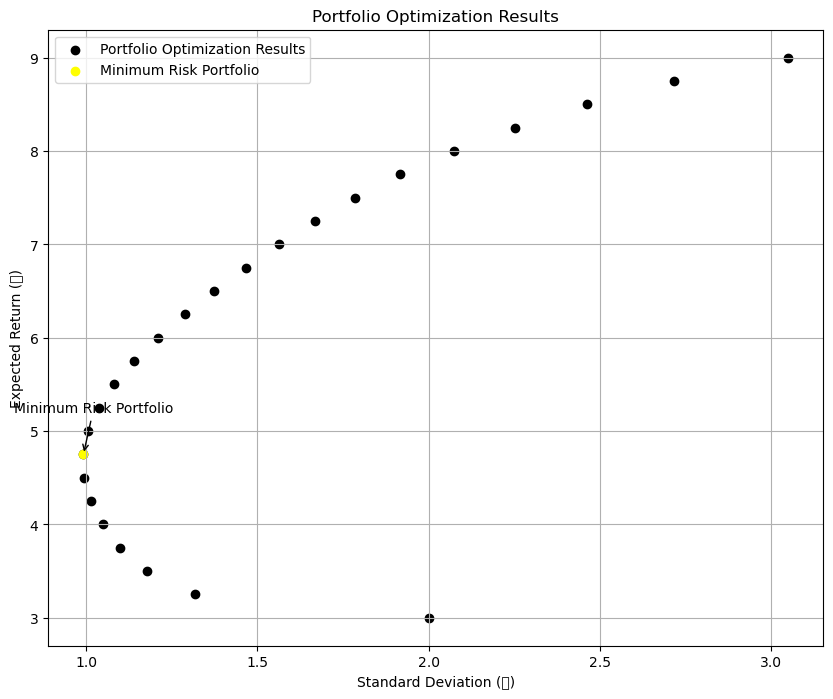

In [5]:
random.seed(2315873)
n = 8
d1 = 7
d2 = 3
dummystep = 10*d1 + d2

for _ in range(dummystep):
    dummy = random.uniform(0, 1)

Corr = np.array([[0]*n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1)**abs(i-j)/(abs(i-j)+1)

ssigma = np.array([[0]*1 for _ in range(n)], dtype=float)
mmu = np.array([[0]*1 for _ in range(n)], dtype=float)
ssigma[0] = 2
mmu[0] = 3

for i in range(n-1):
    ssigma[i+1] = ssigma[i] + 2*random.uniform(0, 1)
    mmu[i+1] = mmu[i] + 1

ddiag = np.array([[0]*n for _ in range(n)], dtype=float)
np.fill_diagonal(ddiag, ssigma)
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5*(C2 + C2.T)

m = gp.Model('portfolio')

x = m.addMVar(n, lb=0.0, ub=1.0, vtype=GRB.CONTINUOUS, name='x')

portfolio_risk = x @ C @ x
m.setObjective(portfolio_risk, GRB.MINIMIZE)

m.addConstr(x.sum() == 1, 'budget')

m.write('portfolio_selection_optimization.lp')

optimal_allocations = []

target_returns = np.arange(3.00, 9.25, 0.25)

for target_return in target_returns:
    
    target_return_constraint = m.addConstr(mmu.T @ x == target_return, 'target_return')

    
    m.optimize()
    if m.status == GRB.OPTIMAL:
        optimal_allocation = x.X
        optimal_allocations.append(optimal_allocation)
        print(f"Target return: {target_return}, Optimal Allocation: {optimal_allocation}")
    m.remove(target_return_constraint)
    standard_deviations = []
expected_returns = []

for optimal_allocation in optimal_allocations:
    std_dev = sqrt(np.dot(optimal_allocation, np.dot(C, optimal_allocation)))
    exp_return = np.dot(mmu.flatten(), optimal_allocation)

    standard_deviations.append(std_dev)
    expected_returns.append(exp_return)

print("Standard Deviations List (𝜎): \n\n", standard_deviations)
print("\n")
print("Expected Returns List (𝜇): \n\n", expected_returns)
min_risk_index = np.argmin(standard_deviations)  
minrisk_volatility = standard_deviations[min_risk_index]  
minrisk_return = expected_returns[min_risk_index]  
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(standard_deviations, expected_returns, color='black', label='Portfolio Optimization Results')
ax.scatter(minrisk_volatility, minrisk_return, color='yellow', label='Minimum Risk Portfolio')
ax.annotate('Minimum Risk Portfolio', (minrisk_volatility, minrisk_return), 
             xytext=(-50, 30), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.set_xlabel('Standard Deviation (𝜎)')
ax.set_ylabel('Expected Return (𝜇)')
ax.set_title('Portfolio Optimization Results')
ax.legend()
ax.grid(True)
plt.show()



In [ ]:
#TASK 2

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22621.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 2 rows, 8 columns and 16 nonzeros
Model fingerprint: 0xf17f5904
Model has 36 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve time: 0.01s
Presolved: 2 rows, 8 columns, 16 nonzeros
Presolved model has 36 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 7
 AA' NZ     : 3.600e+01
 Factor NZ  : 4.500e+01
 Factor Ops : 2.850e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   9.20081071

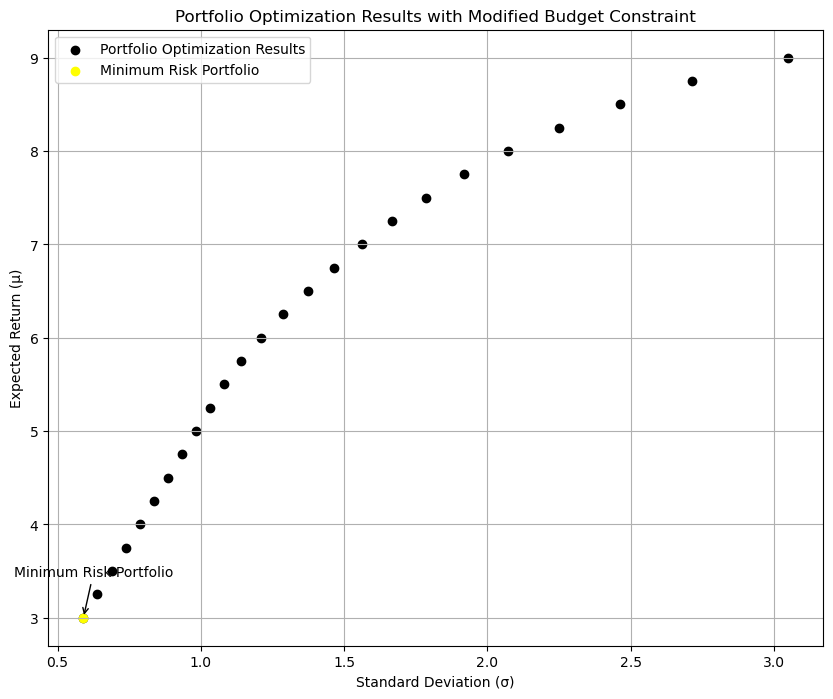

In [6]:
m = gp.Model('portfolio')

x = m.addMVar(n, lb=0.0, ub=1.0, vtype=GRB.CONTINUOUS, name='x')

portfolio_risk = x @ C @ x
m.setObjective(portfolio_risk, GRB.MINIMIZE)

m.addConstr(x.sum() <= 1, 'modified_budget')

optimal_allocations = []
target_returns = np.arange(3.00, 9.25, 0.25)

for target_return in target_returns:
    target_return_constraint = m.addConstr(mmu.T @ x == target_return, 'target_return')
    m.optimize()
    if m.status == GRB.OPTIMAL:
        optimal_allocation = x.X
        optimal_allocations.append(optimal_allocation)
    m.remove(target_return_constraint)

standard_deviations = []
expected_returns = []

for optimal_allocation in optimal_allocations:
    std_dev = sqrt(np.dot(optimal_allocation, np.dot(C, optimal_allocation)))
    exp_return = np.dot(mmu.flatten(), optimal_allocation)
    standard_deviations.append(std_dev)
    expected_returns.append(exp_return)
    min_risk_index = np.argmin(standard_deviations)
minrisk_volatility = standard_deviations[min_risk_index]
minrisk_return = expected_returns[min_risk_index]

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(standard_deviations, expected_returns, color='black', label='Portfolio Optimization Results')
ax.scatter(minrisk_volatility, minrisk_return, color='yellow', label='Minimum Risk Portfolio')
ax.annotate('Minimum Risk Portfolio', (minrisk_volatility, minrisk_return), xytext=(-50, 30), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.set_xlabel('Standard Deviation (σ)')
ax.set_ylabel('Expected Return (μ)')
ax.set_title('Portfolio Optimization Results with Modified Budget Constraint')
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
#TASK 3

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22621.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 2 rows, 8 columns and 16 nonzeros
Model fingerprint: 0xd425d869
Model has 36 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve time: 0.01s
Presolved: 2 rows, 8 columns, 16 nonzeros
Presolved model has 36 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 7
 AA' NZ     : 3.600e+01
 Factor NZ  : 4.500e+01
 Factor Ops : 2.850e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   9.20268978

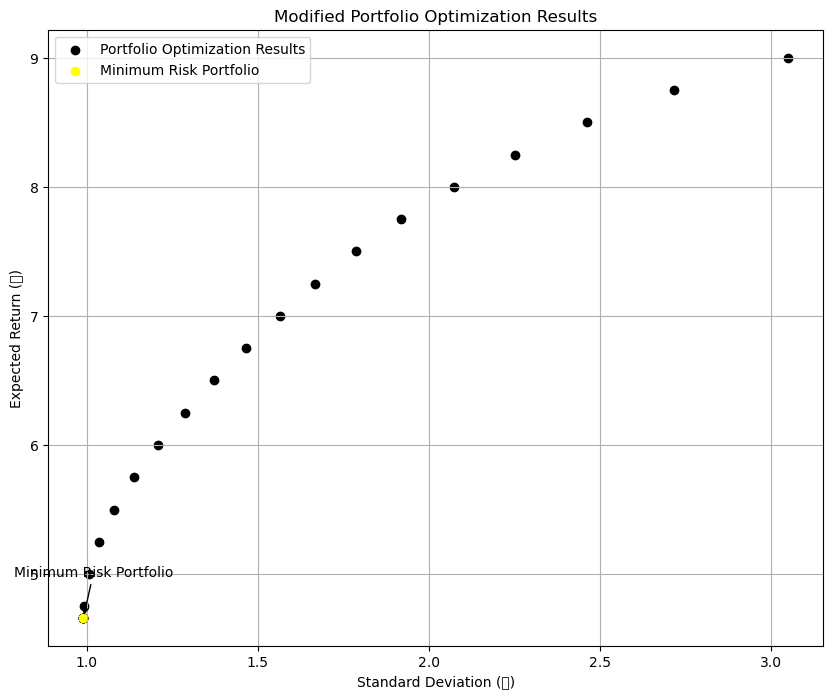

In [7]:
m = gp.Model('portfolio')

x = m.addMVar(n, lb=0.0, ub=1.0, vtype=GRB.CONTINUOUS, name='x')

portfolio_risk = x @ C @ x
m.setObjective(portfolio_risk, GRB.MINIMIZE)

m.addConstr(x.sum() == 1, 'budget')

target_returns = np.arange(3.00, 9.25, 0.25)
optimal_allocations = []

for target_return in target_returns:
    target_return_constraint = m.addConstr(mmu.T @ x >= target_return, 'target_return')
    m.optimize()

    if m.status == GRB.OPTIMAL:
        optimal_allocation = x.X
        optimal_allocations.append(optimal_allocation)

    m.remove(target_return_constraint)

standard_deviations = [sqrt(np.dot(optimal_allocation, np.dot(C, optimal_allocation))) for optimal_allocation in optimal_allocations]
expected_returns = [np.dot(mmu.flatten(), optimal_allocation) for optimal_allocation in optimal_allocations]

min_risk_index = np.argmin(standard_deviations)
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(standard_deviations, expected_returns, color='black', label='Portfolio Optimization Results')
ax.scatter(standard_deviations[min_risk_index], expected_returns[min_risk_index], color='yellow', label='Minimum Risk Portfolio')
ax.annotate('Minimum Risk Portfolio', (standard_deviations[min_risk_index], expected_returns[min_risk_index]), xytext=(-50, 30), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.set_xlabel('Standard Deviation (𝜎)')
ax.set_ylabel('Expected Return (𝜇)')
ax.set_title('Modified Portfolio Optimization Results')
ax.legend()
ax.grid(True)
plt.show()


In [ ]:
#TASK 4

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22621.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 2 rows, 8 columns and 16 nonzeros
Model fingerprint: 0x5d837cf9
Model has 36 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve time: 0.01s
Presolved: 2 rows, 8 columns, 16 nonzeros
Presolved model has 36 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 7
 AA' NZ     : 3.600e+01
 Factor NZ  : 4.500e+01
 Factor Ops : 2.850e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.37673974

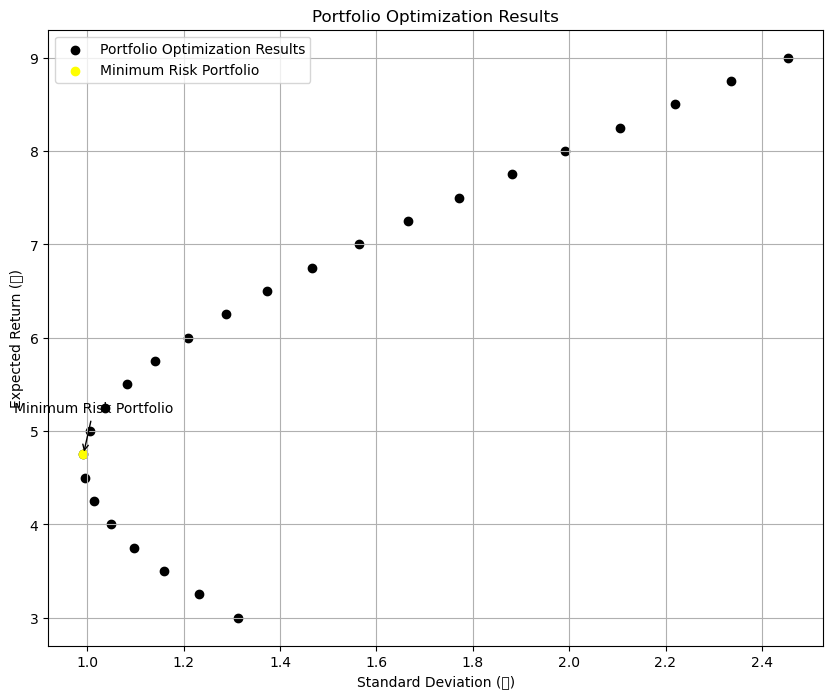

In [8]:
m = gp.Model('portfolio')

x = m.addMVar(n, lb=-GRB.INFINITY, ub=1.0, vtype=GRB.CONTINUOUS, name='x')


portfolio_risk = x @ C @ x
m.setObjective(portfolio_risk, GRB.MINIMIZE)

m.addConstr(x.sum() == 1, 'budget')

m.write('portfolio_selection_optimization.lp')

optimal_allocations = []

target_returns = np.arange(3.00, 9.25, 0.25)

for target_return in target_returns:
    
    target_return_constraint = m.addConstr(mmu.T @ x == target_return, 'target_return')

    m.optimize()

    if m.status == GRB.OPTIMAL:
        
        optimal_allocation = x.X

        optimal_allocations.append(optimal_allocation)

        print(f"Target return: {target_return}, Optimal Allocation: {optimal_allocation}")

    m.remove(target_return_constraint)


standard_deviations = []
expected_returns = []

for optimal_allocation in optimal_allocations:
    std_dev = sqrt(np.dot(optimal_allocation, np.dot(C, optimal_allocation)))
    exp_return = np.dot(mmu.flatten(), optimal_allocation)

    standard_deviations.append(std_dev)
    expected_returns.append(exp_return)

print("Standard Deviations List (𝜎): \n\n", standard_deviations)
print("\n")
print("Expected Returns List (𝜇): \n\n", expected_returns)
import matplotlib.pyplot as plt
import numpy as np


min_risk_index = np.argmin(standard_deviations)  
minrisk_volatility = standard_deviations[min_risk_index]  
minrisk_return = expected_returns[min_risk_index]  

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(standard_deviations, expected_returns, color='black', label='Portfolio Optimization Results')

ax.scatter(minrisk_volatility, minrisk_return, color='yellow', label='Minimum Risk Portfolio')
ax.annotate('Minimum Risk Portfolio', (minrisk_volatility, minrisk_return), 
             xytext=(-50, 30), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='->'))

ax.set_xlabel('Standard Deviation (𝜎)')
ax.set_ylabel('Expected Return (𝜇)')
ax.set_title('Portfolio Optimization Results')
ax.legend()
ax.grid(True)
plt.show()